# **ĐỒ ÁN GIỮA KÌ - TRỰC QUAN HÓA DỮ LIỆU**

---

## **Thông tin nhóm**
- #### Nhóm 9
- #### Thành viên nhóm:

    |   MSSV   | HỌ VÀ TÊN               |
    |:--------:|:------------------------|
    | 21127399 | Nguyễn Đỗ Nguyên Phương |
    | 22127081 | Huỳnh Lê Hải Dương      |
    | 22127117 | Lý Liên Hoa             |
    | 22127352 | Võ Anh Quân             |
    | 22127358 | Phạm Văn Quyến          |

---

## **Giới thiệu đồ án**
Bệnh tim mạch là một trong những nguyên nhân hàng đầu gây tử vong trên thế giới, trong đó đau tim (heart attack) là một tình trạng nghiêm trọng. Dự án này tập trung vào việc phân tích dữ liệu liên quan đến nguy cơ đau tim dựa trên dataset [Heart Attack Prediction in United States](https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-united-states/data?fbclid=IwZXh0bgNhZW0CMTEAAR0Zu-7XwdYN0O6wjPHv9WwsyYfd0hKNYf2avMuCTFQ0L7ZpWZNemvngpTI_aem_k-7lMUwF3cQjxsToxqIgOg) từ Kaggle. 

Mục tiêu chính là phân tích, khám phá và hiểu rõ các yếu tố nào có ảnh hưởng lớn đến nguy cơ đau tim, từ đó cung cấp những thông tin hữu ích cho y tế và sức khỏe cộng đồng.

---

## **1. Thu thập dữ liệu**

### **1.1. Về dataset**
Bộ dữ liệu này chứa thông tin về các yếu tố sức khỏe và lối sống khác nhau có thể ảnh hưởng đến các cơn đau tim ở Hoa Kỳ. Nó bao gồm các chi tiết như tuổi tác, cholesterol, huyết áp và thói quen hút thuốc, cùng với kết quả là liệu một cơn đau tim có xảy ra hay không. Mục tiêu là giúp xác định các rủi ro và xu hướng tiềm năng có thể dẫn đến nhận thức và phòng ngừa sức khỏe tim mạch tốt hơn.

### **1.2. Giấy phép**
- [**CC0: Public Domain**](https://creativecommons.org/publicdomain/zero/1.0/)
- Không có bản quyền.

### **1.3. Tác giả đã thu thập data như thế nào?**
Tác giả đã sử dụng phương pháp **cào web** để cào trên 3 trang web dữ liệu khác nhau. Kết quả cuối cùng, bộ dataset có tổng cộng **32 thuộc tính** khác nhau có thể ảnh hưởng đến bệnh tim mạch (bao gồm Gender, Cholesterol, BloodPressure, HeartRate, ...) và **372,974 bản ghi**.

---

## **2. Đọc dữ liệu**

**Thư viện**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

**Thiết lập lựa chọn trình bày**

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

**Đọc dữ liệu**

In [3]:
df = pd.read_csv('heart_attack_dataset.csv')

## **3. Khám phá và phân tích dữ liệu**

**Kích thước dữ liệu**

In [4]:
n_rows, n_cols = df.shape
print("Kích thước bộ dữ liệu:")
print(f'- Số lượng dòng (bản ghi): {n_rows}')
print(f'- Số lượng cột (thuộc tính): {n_cols}')

Kích thước bộ dữ liệu:
- Số lượng dòng (bản ghi): 372974
- Số lượng cột (thuộc tính): 32


In [5]:
print("5 dòng đầu tiên của bộ dữ liệu:")

df.head()

5 dòng đầu tiên của bộ dữ liệu:


,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,PhysicalActivity,AlcoholConsumption,Diet,StressLevel,Ethnicity,Income,EducationLevel,Medication,ChestPainType,ECGResults,MaxHeartRate,ST_Depression,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,6,0,Unhealthy,1,Hispanic,64510,High School,Yes,Typical,ST-T abnormality,173,0.52,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,1,2,Unhealthy,6,Asian,91773,College,No,Atypical,LV hypertrophy,189,3.79,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,1,3,Healthy,3,Black,173550,College,No,Non-anginal,Normal,122,0.17,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,6,0,Healthy,3,Hispanic,43861,High School,Yes,Atypical,ST-T abnormality,104,0.67,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,4,1,Moderate,1,Hispanic,83404,High School,Yes,Typical,ST-T abnormality,126,5.00,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


**Số lượng dòng bị trùng**

In [6]:
duplicated_rows = df.duplicated().sum()

print(f"Số lượng dòng bị trùng: {duplicated_rows}")

Số lượng dòng bị trùng: 0


$\rightarrow$ Không có dòng nào bị trùng lập

**Dữ liệu thiếu ở mỗi cột**

In [7]:
missing_values_sum = df.isnull().sum()

print(f"Tổng dữ liệu thiếu ở mỗi cột:\n")
print(missing_values_sum)

Tổng dữ liệu thiếu ở mỗi cột:

Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
PhysicalActivity         0
AlcoholConsumption       0
Diet                     0
StressLevel              0
Ethnicity                0
Income                   0
EducationLevel           0
Medication               0
ChestPainType            0
ECGResults               0
MaxHeartRate             0
ST_Depression            0
ExerciseInducedAngina    0
Slope                    0
NumberOfMajorVessels     0
Thalassemia              0
PreviousHeartAttack      0
StrokeHistory            0
Residence                0
EmploymentStatus         0
MaritalStatus            0
Outcome                  0
dtype: int64


$\rightarrow$ Không có cột nào có dữ liệu thiếu

**Kiểu dữ liệu của mỗi cột**

In [8]:
print('Kiểu dữ liệu hiện tại của mỗi cột: \n')

print(df.dtypes)

Kiểu dữ liệu hiện tại của mỗi cột: 

Age                        int64
Gender                    object
Cholesterol                int64
BloodPressure              int64
HeartRate                  int64
BMI                      float64
Smoker                     int64
Diabetes                   int64
Hypertension               int64
FamilyHistory              int64
PhysicalActivity           int64
AlcoholConsumption         int64
Diet                      object
StressLevel                int64
Ethnicity                 object
Income                     int64
EducationLevel            object
Medication                object
ChestPainType             object
ECGResults                object
MaxHeartRate               int64
ST_Depression            float64
ExerciseInducedAngina     object
Slope                     object
NumberOfMajorVessels       int64
Thalassemia               object
PreviousHeartAttack        int64
StrokeHistory              int64
Residence                 object
Employ

**Thống kê cơ bản của dữ liệu số**

In [9]:
print("Thống kê cơ bản của dữ liệu cột số:")
df.describe()

Thống kê cơ bản của dữ liệu cột số:


,Age,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,PhysicalActivity,AlcoholConsumption,StressLevel,Income,MaxHeartRate,ST_Depression,NumberOfMajorVessels,PreviousHeartAttack,StrokeHistory
count,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000
mean,56.975151,199.455844,134.508234,89.495043,29.006733,0.499225,0.500987,0.500973,0.499901,3.003475,2.000048,5.001885,110033.409913,149.463896,2.501799,1.498525,0.496938,0.500815
std,15.867016,57.723381,25.984528,17.342658,6.345460,0.500000,0.500000,0.500000,0.500001,2.000114,1.414572,2.582025,51961.721991,28.849990,1.443696,1.118003,0.499991,0.500000
min,30.000000,100.000000,90.000000,60.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20000.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,149.000000,112.000000,74.000000,23.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,64957.250000,124.000000,1.250000,0.000000,0.000000,0.000000
50%,57.000000,199.000000,134.000000,89.000000,29.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,5.000000,110111.000000,149.000000,2.500000,1.000000,0.000000,1.000000
75%,71.000000,249.000000,157.000000,105.000000,34.500000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,7.000000,155012.000000,174.000000,3.750000,2.000000,1.000000,1.000000
max,84.000000,299.000000,179.000000,119.000000,40.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,9.000000,199999.000000,199.000000,5.000000,3.000000,1.000000,1.000000


In [10]:
numerical_cols = df.select_dtypes(include='number').columns

numerical_cols

Index(['Age', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI', 'Smoker',
       'Diabetes', 'Hypertension', 'FamilyHistory', 'PhysicalActivity',
       'AlcoholConsumption', 'StressLevel', 'Income', 'MaxHeartRate',
       'ST_Depression', 'NumberOfMajorVessels', 'PreviousHeartAttack',
       'StrokeHistory'],
      dtype='object')

In [13]:
categorical_cols = df.select_dtypes(exclude='number').columns

categorical_cols

Index(['Gender', 'Diet', 'Ethnicity', 'EducationLevel', 'Medication',
       'ChestPainType', 'ECGResults', 'ExerciseInducedAngina', 'Slope',
       'Thalassemia', 'Residence', 'EmploymentStatus', 'MaritalStatus',
       'Outcome'],
      dtype='object')

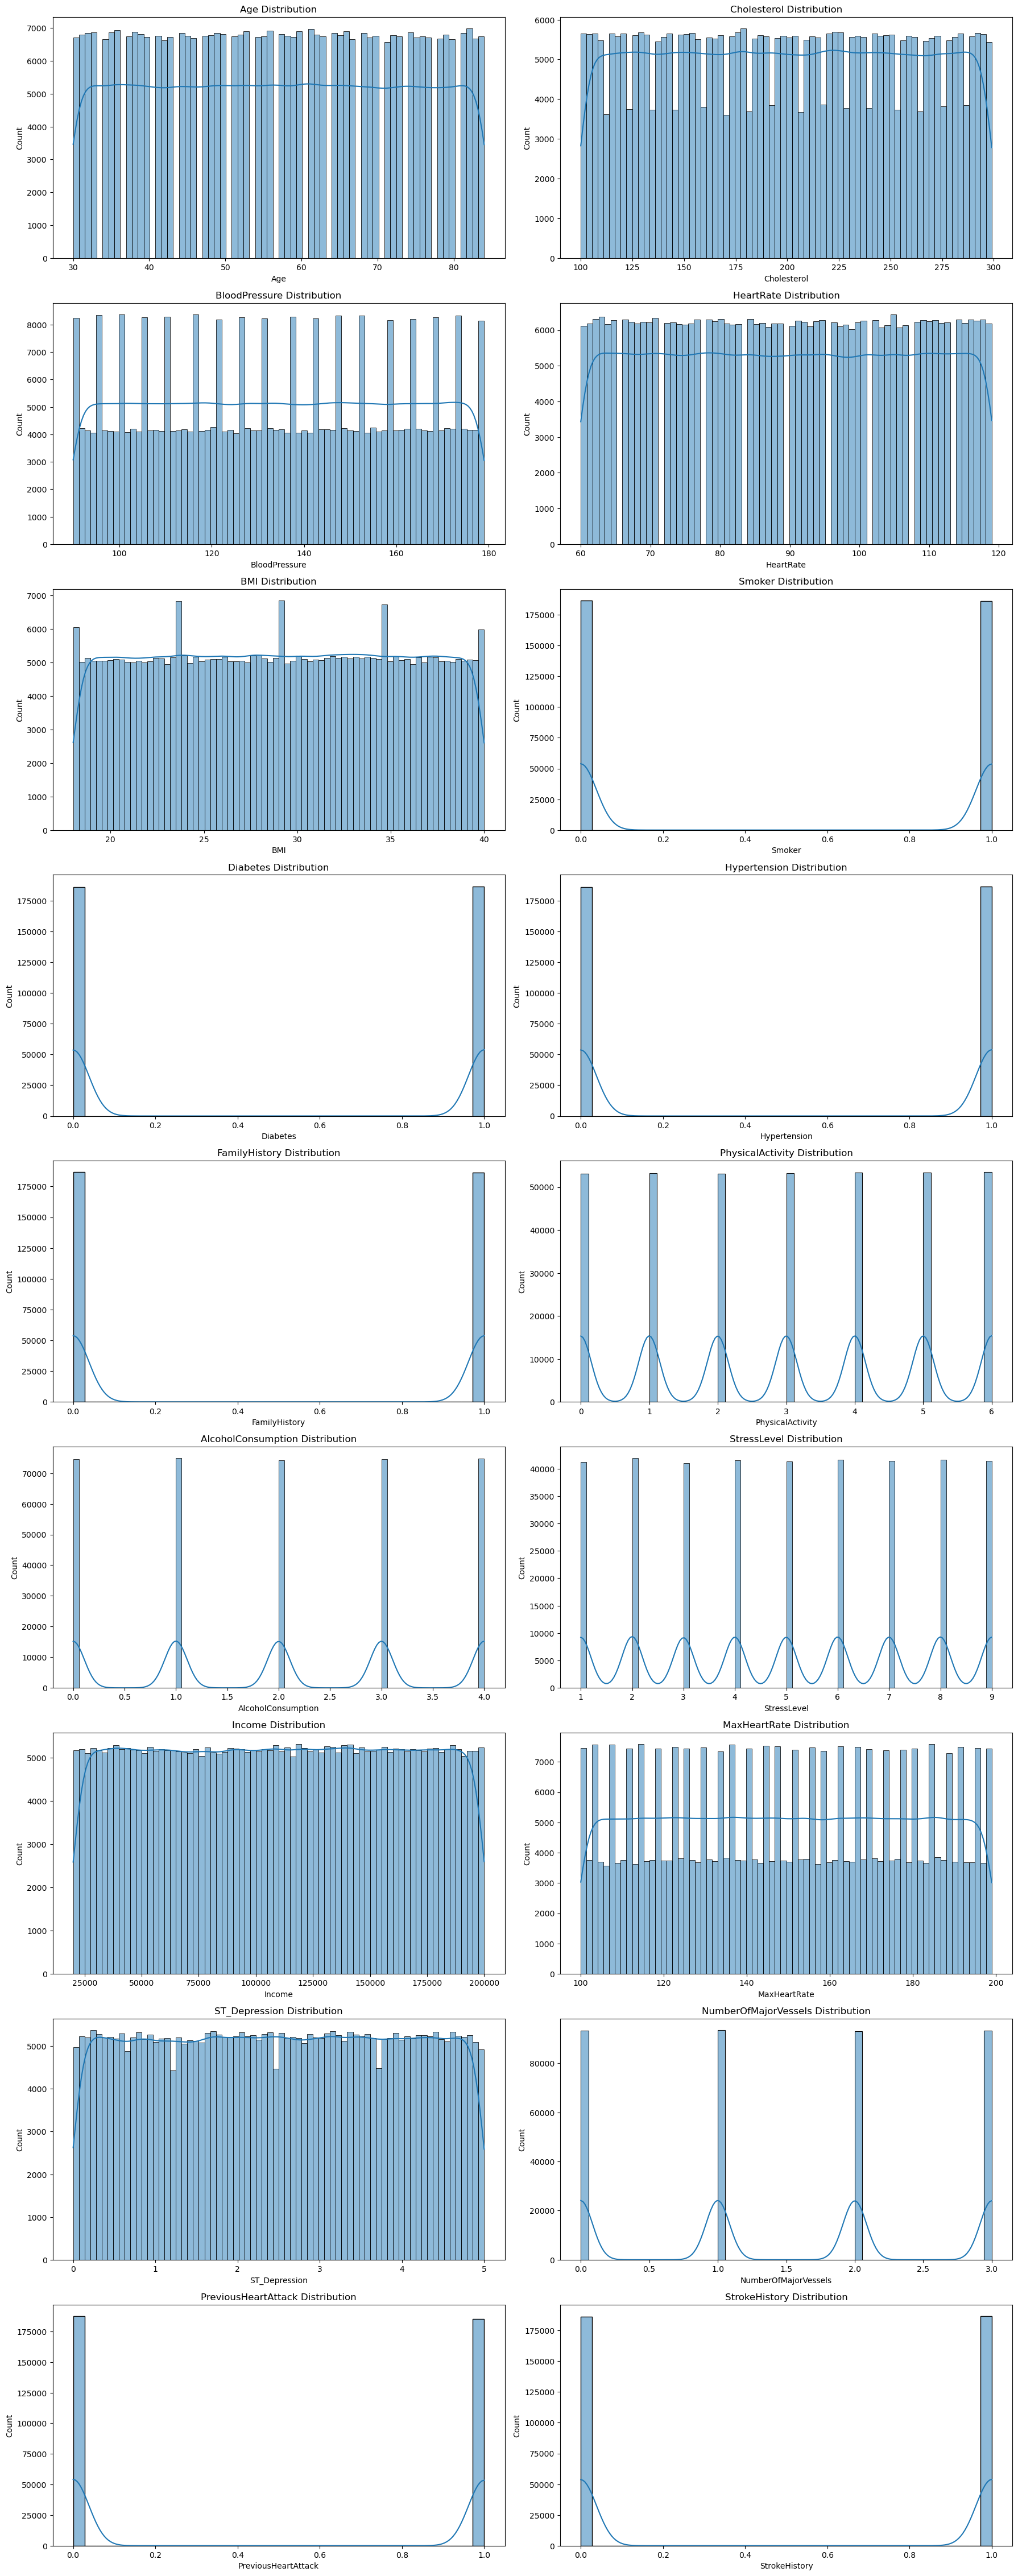

In [12]:
num_numerical = len(numerical_cols)


fig, axes = plt.subplots(nrows=(num_numerical // 2) + 1, ncols=2, figsize=(18, 5 * ((num_numerical // 2) + 1)))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


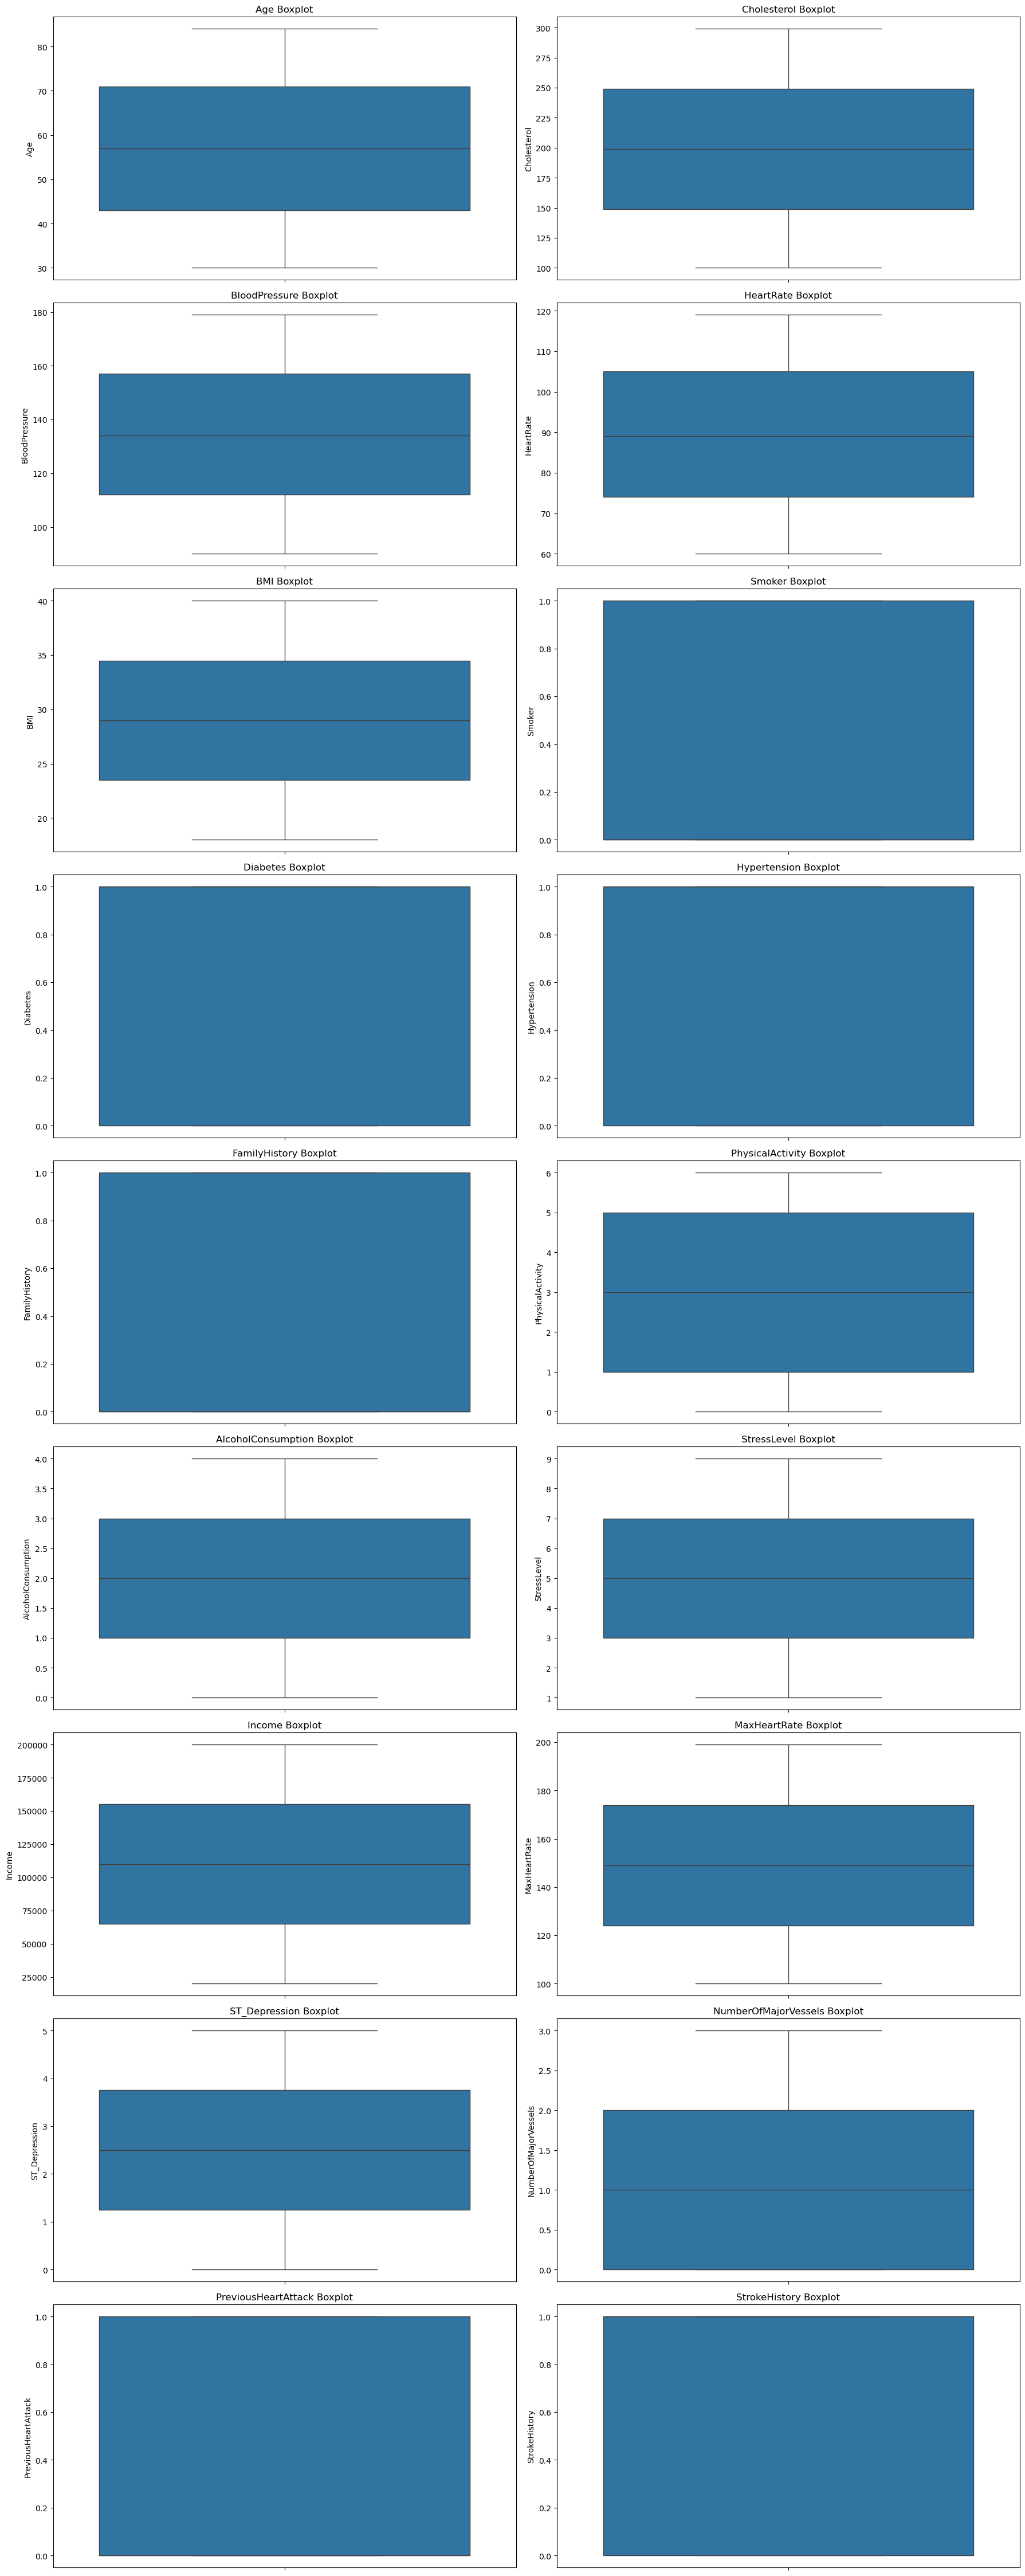

In [26]:
num_numerical = len(numerical_cols)


fig, axes = plt.subplots(nrows=(num_numerical // 2) + 1, ncols=2, figsize=(18, 5 * ((num_numerical // 2) + 1)))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


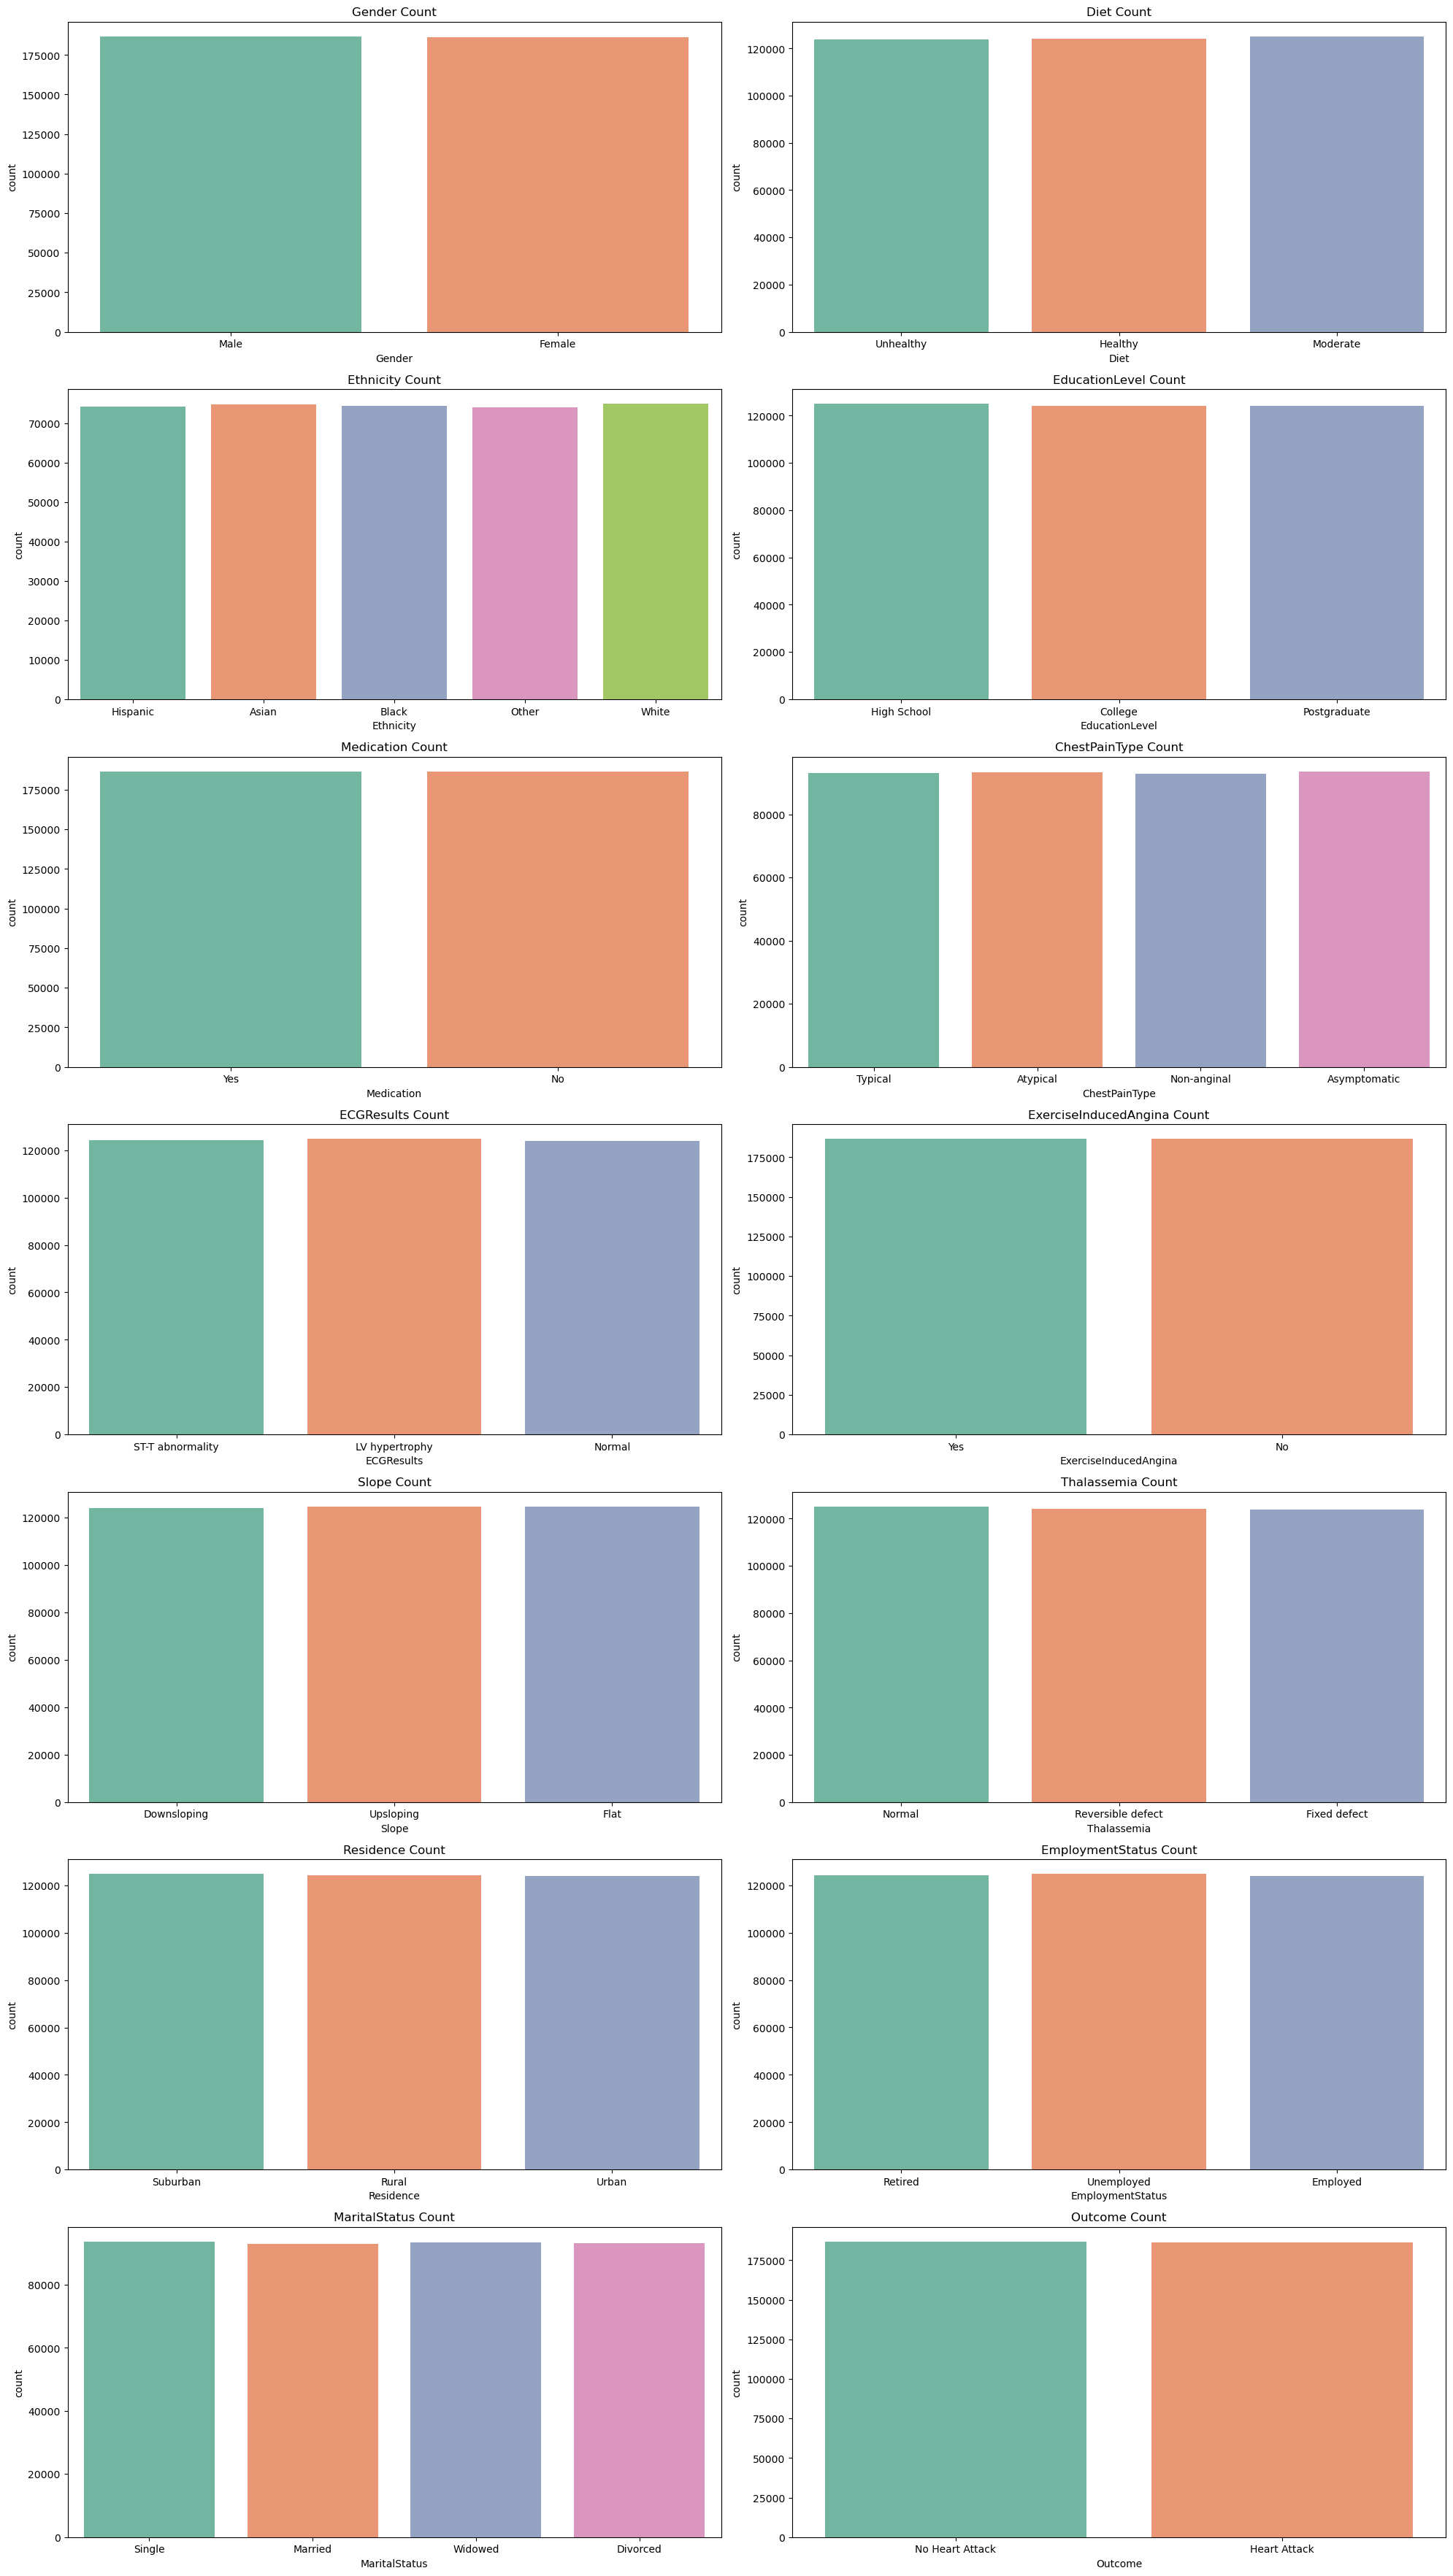

In [24]:
fig, axes = plt.subplots(nrows=(len(categorical_cols) // 2) + 1, ncols=2, figsize=(20, 5 * ((len(categorical_cols) // 2) + 1)))

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette='Set2', legend=False)
    axes[i].set_title(f'{col} Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


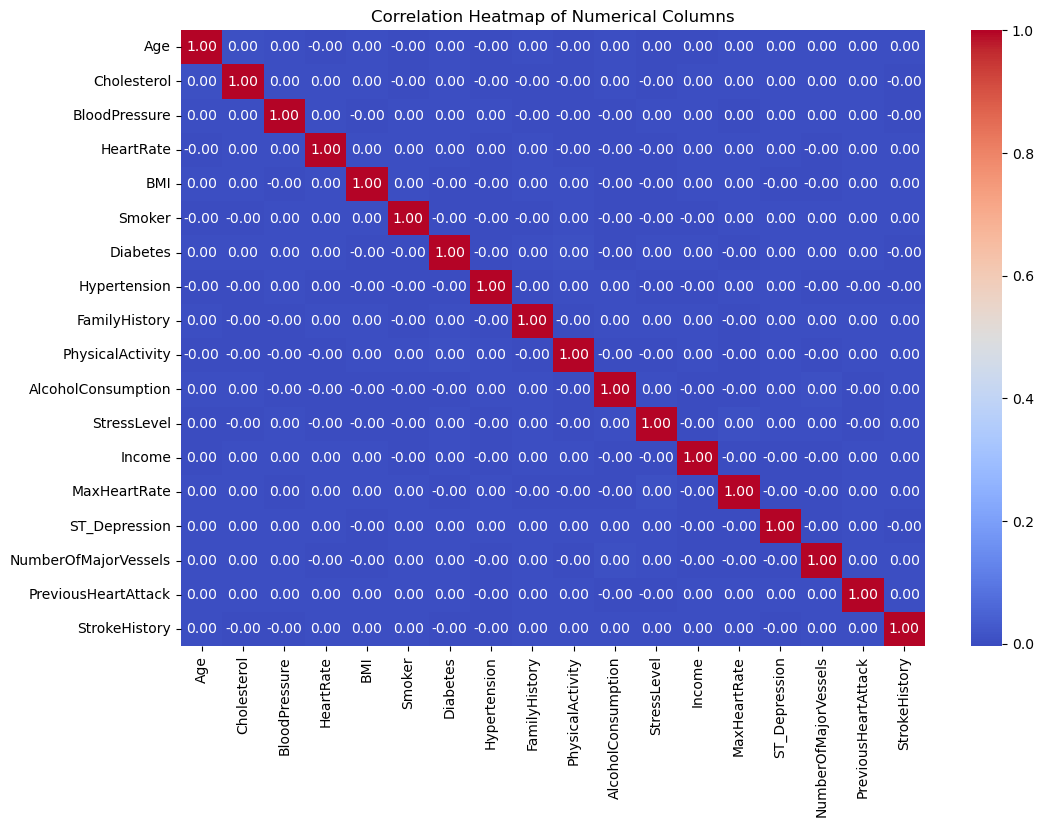

In [27]:
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

## 2. Tiền xử lí

### Encoding

### Data processed

### Biểu diễn

### Chia tách dữ liệu